# Preliminary EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

## Importing subset of COVID-19 case data

In [2]:
!head -5 ./../data/COVID-19_Case_Surveillance_Public_Use_Data_with_Geography.csv

case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
2020-08,KY,21,GRAYSON,21085,0 - 17 years,NA,NA,NA,,0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,
2021-01,NC,37,MARTIN,37117,0 - 17 years,NA,NA,NA,0,,Missing,Unknown,Laboratory-confirmed case,Asymptomatic,No,Unknown,No,
2021-03,VT,50,FRANKLIN,50011,18 to 49 years,NA,NA,NA,0,0,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,Missing,No,Yes
2020-09,GA,13,CATOOSA,13047,0 - 17 years,Female,Unknown,Missing,,,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,


In [3]:
num_records = 2_000_000

In [4]:
df_cases = pd.read_csv(
    './../data/COVID-19_Case_Surveillance_Public_Use_Data_with_Geography.csv',
    nrows=num_records)

In [5]:
df_cases

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-08,KY,21,GRAYSON,21085.0,0 - 17 years,NaN,NaN,NaN,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
1,2021-01,NC,37,MARTIN,37117.0,0 - 17 years,NaN,NaN,NaN,0.0,NaN,Missing,Unknown,Laboratory-confirmed case,Asymptomatic,No,Unknown,No,NaN
2,2021-03,VT,50,FRANKLIN,50011.0,18 to 49 years,NaN,NaN,NaN,0.0,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,Missing,No,Yes
3,2020-09,GA,13,CATOOSA,13047.0,0 - 17 years,Female,Unknown,Missing,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,NaN
4,2021-04,PA,42,CLINTON,42035.0,0 - 17 years,Female,NaN,NaN,0.0,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,2020-10,ID,16,BANNOCK,16005.0,18 to 49 years,Female,White,Non-Hispanic/Latino,0.0,NaN,Other detection method (specify),Missing,Probable Case,Symptomatic,No,Missing,No,NaN
1999996,2021-02,AR,5,BENTON,5007.0,18 to 49 years,Female,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,Missing,NaN
1999997,2020-08,WI,55,BROWN,55009.0,18 to 49 years,Female,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
1999998,2020-12,WI,55,CHIPPEWA,55017.0,18 to 49 years,Female,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,No,NaN


In [6]:
df_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 19 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   case_month                       object 
 1   res_state                        object 
 2   state_fips_code                  int64  
 3   res_county                       object 
 4   county_fips_code                 float64
 5   age_group                        object 
 6   sex                              object 
 7   race                             object 
 8   ethnicity                        object 
 9   case_positive_specimen_interval  float64
 10  case_onset_interval              float64
 11  process                          object 
 12  exposure_yn                      object 
 13  current_status                   object 
 14  symptom_status                   object 
 15  hosp_yn                          object 
 16  icu_yn                           object 
 17  death_yn

In [7]:
df_cases.columns

Index(['case_month', 'res_state', 'state_fips_code', 'res_county',
       'county_fips_code', 'age_group', 'sex', 'race', 'ethnicity',
       'case_positive_specimen_interval', 'case_onset_interval', 'process',
       'exposure_yn', 'current_status', 'symptom_status', 'hosp_yn', 'icu_yn',
       'death_yn', 'underlying_conditions_yn'],
      dtype='object')

In [8]:
data_types = {'case_month': 'string', 'res_state': 'string', 
    'state_fips_code': 'string', 'res_county': 'string', 
    'county_fips_code': 'string', 'age_group': 'string', 'sex': 'string', 
    'race': 'string', 'ethnicity': 'Int16', 
    'case_positive_specimen_interval': 'Int16', 
    'case_onset_interval': 'string', 'process': 'string', 
    'exposure_yn': 'string', 'current_status': 'string', 
    'symptom_status': 'string', 'hosp_yn': 'string', 'icu_yn': 'string', 
    'death_yn': 'string', 'underlying_conditions_yn': 'string',}

In [9]:
df_cases = pd.read_csv(
    './../data/COVID-19_Case_Surveillance_Public_Use_Data_with_Geography.csv',
    dtype='string',
    nrows=num_records)

In [10]:
df_cases = df_cases.drop(columns=['state_fips_code'])

In [11]:
df_cases['case_positive_specimen_interval'] = pd.to_numeric(
    df_cases['case_positive_specimen_interval'])
df_cases['case_onset_interval'] = pd.to_numeric(
    df_cases['case_onset_interval'])

In [12]:
df_cases

,case_month,res_state,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-08,KY,GRAYSON,21085,0 - 17 years,<NA>,<NA>,<NA>,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,<NA>
1,2021-01,NC,MARTIN,37117,0 - 17 years,<NA>,<NA>,<NA>,0.0,NaN,Missing,Unknown,Laboratory-confirmed case,Asymptomatic,No,Unknown,No,<NA>
2,2021-03,VT,FRANKLIN,50011,18 to 49 years,<NA>,<NA>,<NA>,0.0,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,Missing,No,Yes
3,2020-09,GA,CATOOSA,13047,0 - 17 years,Female,Unknown,Missing,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,<NA>
4,2021-04,PA,CLINTON,42035,0 - 17 years,Female,<NA>,<NA>,0.0,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,No,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,2020-10,ID,BANNOCK,16005,18 to 49 years,Female,White,Non-Hispanic/Latino,0.0,NaN,Other detection method (specify),Missing,Probable Case,Symptomatic,No,Missing,No,<NA>
1999996,2021-02,AR,BENTON,05007,18 to 49 years,Female,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,Missing,<NA>
1999997,2020-08,WI,BROWN,55009,18 to 49 years,Female,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,<NA>
1999998,2020-12,WI,CHIPPEWA,55017,18 to 49 years,Female,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,No,<NA>


In [13]:
df_cases.describe()

,case_positive_specimen_interval,case_onset_interval
count,553177.000000,1.019877e+06
mean,0.262778,1.077610e-01
std,1.871492,1.623491e+00
min,-58.000000,-4.100000e+01
25%,0.000000,0.000000e+00
50%,0.000000,0.000000e+00
75%,0.000000,0.000000e+00
max,58.000000,6.100000e+01


In [14]:
22414/num_records

0.011207

Only 8% of records report yes or no for underlying conditions. The rest are missing.

In [15]:
reported_states = sorted(df_cases['res_state'].unique())
reported_states[:4]

['AK', 'AL', 'AR', 'AZ']

In [16]:
all_states = ['AL', 'AK', 'AS', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'GU', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'MP', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'VI', 'WA', 'WV', 'WI', 'WY']

In [17]:
for state in all_states:
    if state not in reported_states:
        print(state)

AS
DC
GU
MP
PR
VI
WY


Wyoming is not showing up in the subset of data. Does this extend to the full dataset?

In [18]:
df_cases

,case_month,res_state,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-08,KY,GRAYSON,21085,0 - 17 years,<NA>,<NA>,<NA>,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,<NA>
1,2021-01,NC,MARTIN,37117,0 - 17 years,<NA>,<NA>,<NA>,0.0,NaN,Missing,Unknown,Laboratory-confirmed case,Asymptomatic,No,Unknown,No,<NA>
2,2021-03,VT,FRANKLIN,50011,18 to 49 years,<NA>,<NA>,<NA>,0.0,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,Missing,No,Yes
3,2020-09,GA,CATOOSA,13047,0 - 17 years,Female,Unknown,Missing,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,<NA>
4,2021-04,PA,CLINTON,42035,0 - 17 years,Female,<NA>,<NA>,0.0,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,No,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,2020-10,ID,BANNOCK,16005,18 to 49 years,Female,White,Non-Hispanic/Latino,0.0,NaN,Other detection method (specify),Missing,Probable Case,Symptomatic,No,Missing,No,<NA>
1999996,2021-02,AR,BENTON,05007,18 to 49 years,Female,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,Missing,<NA>
1999997,2020-08,WI,BROWN,55009,18 to 49 years,Female,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,<NA>
1999998,2020-12,WI,CHIPPEWA,55017,18 to 49 years,Female,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,No,<NA>


In [19]:
df_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 18 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   case_month                       string 
 1   res_state                        string 
 2   res_county                       string 
 3   county_fips_code                 string 
 4   age_group                        string 
 5   sex                              string 
 6   race                             string 
 7   ethnicity                        string 
 8   case_positive_specimen_interval  float64
 9   case_onset_interval              float64
 10  process                          string 
 11  exposure_yn                      string 
 12  current_status                   string 
 13  symptom_status                   string 
 14  hosp_yn                          string 
 15  icu_yn                           string 
 16  death_yn                         string 
 17  underlyi

Cases missing county information

In [20]:
df_cases[df_cases['res_county'].isna()]

,case_month,res_state,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
259,2020-11,AZ,<NA>,<NA>,18 to 49 years,Female,Missing,Hispanic/Latino,NaN,NaN,Missing,Missing,Probable Case,Missing,Yes,Missing,<NA>,<NA>
673,2020-04,GA,<NA>,<NA>,65+ years,Female,Black,Missing,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,Missing,<NA>
1781,2020-11,AZ,<NA>,<NA>,18 to 49 years,Female,Missing,Hispanic/Latino,NaN,0.0,Missing,Missing,Probable Case,Symptomatic,No,Missing,<NA>,<NA>
2294,2020-10,IL,<NA>,<NA>,18 to 49 years,Male,Missing,Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,<NA>
3316,2020-11,AZ,<NA>,<NA>,18 to 49 years,Female,Missing,Hispanic/Latino,NaN,0.0,Missing,Missing,Probable Case,Symptomatic,No,Missing,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996254,2020-04,GA,<NA>,<NA>,18 to 49 years,Female,Unknown,Missing,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,<NA>
1997563,2021-04,AZ,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,<NA>
1998304,2021-06,IL,<NA>,<NA>,50 to 64 years,Male,<NA>,<NA>,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,<NA>
1999056,2021-04,AZ,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,<NA>


## Importing community crosswalk by census track

In [21]:
df_counties = pd.read_csv(
    './../data/COVID-19_Community_Vulnerability_Crosswalk_-_Crosswalk_by_Census_Tract.csv')

In [22]:
df_counties.head(2)

,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,County FIPS,LOCATION,Total Score,Max Possible Score,Hardest Hit Area (HHA),HHA Score,Low Income Area (LIA) County SAIPE - (Poverty Percentage),Low Income Area (LIA) County SAIPE- Score,Low Income Area (LIA) Census Tract (Poverty Percentage),Low Income Area (LIA) Census Tract - Score,Tribal Community\n(1 if yes),Tribal Community\nScore (Geographic Only),Rural,Rural - Score
0,ALABAMA,AL,1001,Autauga,1001020100,1001,"Census Tract 201, Autauga County, Alabama",7,7,ModerateBurdenResolving,0,0.121,0,0.1666,7,Non-Tribal,0,0,0
1,ALABAMA,AL,1001,Autauga,1001020200,1001,"Census Tract 202, Autauga County, Alabama",7,7,ModerateBurdenResolving,0,0.121,0,0.1913,7,Non-Tribal,0,0,0


In [23]:
df_counties.columns

Index(['STATE', 'ST_ABBR', 'STCNTY', 'COUNTY', 'FIPS', 'County FIPS',
       'LOCATION', 'Total Score', 'Max Possible Score',
       'Hardest Hit Area (HHA)', 'HHA Score',
       'Low Income Area (LIA) County SAIPE - (Poverty Percentage)',
       'Low Income Area (LIA) County SAIPE- Score',
       'Low Income Area (LIA) Census Tract (Poverty Percentage)',
       'Low Income Area (LIA) Census Tract - Score',
       'Tribal Community\n(1 if yes)',
       'Tribal Community\nScore (Geographic Only)', 'Rural', 'Rural - Score'],
      dtype='object')

In [24]:
use_columns = ['STATE', 'COUNTY', 'County FIPS', 'Low Income Area (LIA) County SAIPE- Score', 'Tribal Community\n(1 if yes)', 'Rural']

In [25]:
column_names = ['state', 'county', 'county_fips', 'low_income_score', 'tribal', 'rural']

In [26]:
df_counties = pd.read_csv(
    './../data/COVID-19_Community_Vulnerability_Crosswalk_-_Crosswalk_by_Census_Tract.csv',
    usecols=use_columns,
    dtype='string')

In [27]:
df_counties.columns = column_names

In [28]:
df_counties = df_counties.astype({'low_income_score': 'int64', 'rural': 'int64'})

In [29]:
df_counties

,state,county,county_fips,low_income_score,tribal,rural
0,ALABAMA,Autauga,01001,0,Non-Tribal,0
1,ALABAMA,Autauga,01001,0,Non-Tribal,0
2,ALABAMA,Autauga,01001,0,Non-Tribal,0
3,ALABAMA,Autauga,01001,0,Non-Tribal,0
4,ALABAMA,Autauga,01001,0,Non-Tribal,0
...,...,...,...,...,...,...
72831,WYOMING,Washakie,56043,0,Non-Tribal,1
72832,WYOMING,Washakie,56043,0,Non-Tribal,1
72833,WYOMING,Washakie,56043,0,Non-Tribal,1
72834,WYOMING,Weston,56045,0,Non-Tribal,1


In [30]:
df_counties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72836 entries, 0 to 72835
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   state             72836 non-null  string
 1   county            72836 non-null  string
 2   county_fips       72836 non-null  string
 3   low_income_score  72836 non-null  int64 
 4   tribal            72836 non-null  string
 5   rural             72836 non-null  int64 
dtypes: int64(2), string(4)
memory usage: 3.3 MB


In [31]:
df_counties['tribal'] = np.where(df_counties['tribal'] == 'Non-Tribal', 0, 1)
df_counties['ctract_count'] = 1

In [32]:
df_counties

,state,county,county_fips,low_income_score,tribal,rural,ctract_count
0,ALABAMA,Autauga,01001,0,0,0,1
1,ALABAMA,Autauga,01001,0,0,0,1
2,ALABAMA,Autauga,01001,0,0,0,1
3,ALABAMA,Autauga,01001,0,0,0,1
4,ALABAMA,Autauga,01001,0,0,0,1
...,...,...,...,...,...,...,...
72831,WYOMING,Washakie,56043,0,0,1,1
72832,WYOMING,Washakie,56043,0,0,1,1
72833,WYOMING,Washakie,56043,0,0,1,1
72834,WYOMING,Weston,56045,0,0,1,1


In [33]:
df_counties = df_counties.groupby(['state', 'county', 'county_fips']).agg(
    {'low_income_score': 'mean', 'tribal': 'sum', 'rural': 'sum', 'ctract_count': 'sum'}).reset_index()

In [34]:
df_counties['perc_tribal_ct'] = df_counties['tribal'] / df_counties['ctract_count']
df_counties['perc_rural_ct'] = df_counties['rural'] / df_counties['ctract_count']

In [35]:
# df_counties = df_counties.drop(columns=['tribal', 'rural', 'ctract_count'])
df_counties = df_counties.drop(columns=['state', 'county', 'tribal', 'rural', 'ctract_count'])

In [36]:
df_counties

,county_fips,low_income_score,perc_tribal_ct,perc_rural_ct
0,01001,0,0.0,0.250000
1,01003,0,0.0,0.290323
2,01005,15,0.0,1.000000
3,01007,15,0.0,1.000000
4,01009,7,0.0,0.888889
...,...,...,...,...
3136,56037,0,0.0,0.250000
3137,56039,0,0.0,1.000000
3138,56041,0,0.0,1.000000
3139,56043,0,0.0,1.000000


## Joining datasets

In [37]:
df = df_cases.merge(
    df_counties, how='left', left_on='county_fips_code', right_on='county_fips')

In [38]:
df = df.drop(columns=['county_fips'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000000 entries, 0 to 1999999
Data columns (total 21 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   case_month                       string 
 1   res_state                        string 
 2   res_county                       string 
 3   county_fips_code                 object 
 4   age_group                        string 
 5   sex                              string 
 6   race                             string 
 7   ethnicity                        string 
 8   case_positive_specimen_interval  float64
 9   case_onset_interval              float64
 10  process                          string 
 11  exposure_yn                      string 
 12  current_status                   string 
 13  symptom_status                   string 
 14  hosp_yn                          string 
 15  icu_yn                           string 
 16  death_yn                         string 
 17  underlyi

In [40]:
df

,case_month,res_state,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,...,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn,low_income_score,perc_tribal_ct,perc_rural_ct
0,2020-08,KY,GRAYSON,21085,0 - 17 years,<NA>,<NA>,<NA>,NaN,0.0,...,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,<NA>,15.0,0.000000,1.000000
1,2021-01,NC,MARTIN,37117,0 - 17 years,<NA>,<NA>,<NA>,0.0,NaN,...,Unknown,Laboratory-confirmed case,Asymptomatic,No,Unknown,No,<NA>,15.0,0.000000,1.000000
2,2021-03,VT,FRANKLIN,50011,18 to 49 years,<NA>,<NA>,<NA>,0.0,0.0,...,Yes,Laboratory-confirmed case,Symptomatic,No,Missing,No,Yes,0.0,0.000000,1.000000
3,2020-09,GA,CATOOSA,13047,0 - 17 years,Female,Unknown,Missing,NaN,NaN,...,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,<NA>,0.0,0.000000,0.090909
4,2021-04,PA,CLINTON,42035,0 - 17 years,Female,<NA>,<NA>,0.0,0.0,...,Yes,Laboratory-confirmed case,Symptomatic,No,No,<NA>,<NA>,7.0,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,2020-10,ID,BANNOCK,16005,18 to 49 years,Female,White,Non-Hispanic/Latino,0.0,NaN,...,Missing,Probable Case,Symptomatic,No,Missing,No,<NA>,7.0,0.181818,0.090909
1999996,2021-02,AR,BENTON,05007,18 to 49 years,Female,White,Non-Hispanic/Latino,0.0,NaN,...,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,Missing,<NA>,0.0,0.122449,0.163265
1999997,2020-08,WI,BROWN,55009,18 to 49 years,Female,White,Non-Hispanic/Latino,NaN,0.0,...,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,<NA>,0.0,0.203704,0.037037
1999998,2020-12,WI,CHIPPEWA,55017,18 to 49 years,Female,White,Non-Hispanic/Latino,NaN,NaN,...,Missing,Laboratory-confirmed case,Missing,No,Missing,No,<NA>,0.0,0.000000,0.272727


In [41]:
df['res_county'] = df['res_county'] + ', ' + df['res_state']

In [42]:
# df.to_csv('./../data/temp.csv', index=False)

## EDA - All Cases

Percent NA values (this does not include 'missing' or 'unknown' values)

In [43]:
(df.isna().sum(axis=0)/len(df)) * 100

case_month                          0.00000
res_state                           0.00000
res_county                          0.13190
county_fips_code                    0.13190
age_group                           3.81875
sex                                11.26790
race                               28.17895
ethnicity                          34.13865
case_positive_specimen_interval    72.34115
case_onset_interval                49.00615
process                             0.00000
exposure_yn                         0.00000
current_status                      0.00000
symptom_status                      0.00000
hosp_yn                             0.00000
icu_yn                              0.00000
death_yn                           12.78640
underlying_conditions_yn           91.85275
low_income_score                    0.13190
perc_tribal_ct                      0.13190
perc_rural_ct                       0.13190
dtype: float64

In [44]:
df['res_state'].value_counts(dropna=False)

GA    113101
OH    108171
NC    106852
VA    104196
IN     92582
TN     87063
MI     83762
PA     80463
NY     77527
IL     75862
FL     71145
WI     69912
CA     65954
MN     63322
KY     63304
AL     60784
SC     52764
OK     52762
AR     44835
IA     40896
WA     35617
KS     34298
CO     34295
OR     31318
MD     29036
NJ     27703
TX     24789
NM     23745
ID     23743
NE     22424
UT     19569
AZ     18471
ME     16636
MA     15829
MS     13760
NH     13191
MO     12750
SD     11872
MT     11872
CT     10552
VT     10189
ND      8881
AK      6596
RI      6596
NV      6595
LA      5276
DE      3958
HI      3958
WV      1224
Name: res_state, dtype: Int64

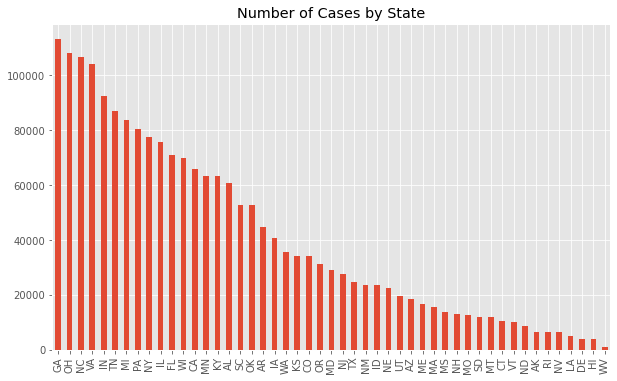

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))
df['res_state'].value_counts(dropna=False).plot(kind='bar', ax=ax)
ax.set_title('Number of Cases by State');

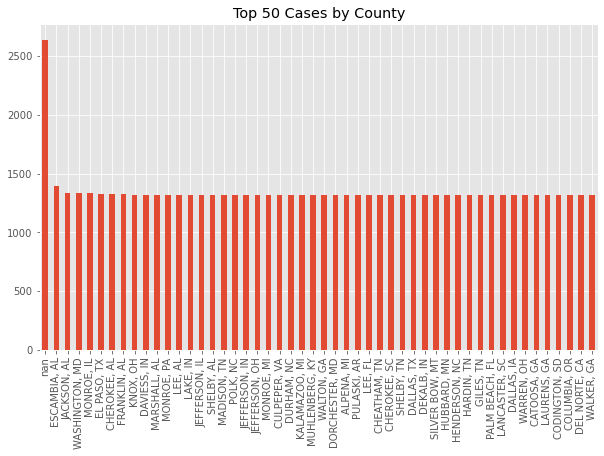

In [46]:
fig, ax = plt.subplots(figsize=(10, 6))
df['res_county'].value_counts(dropna=False)[:50].plot(kind='bar', ax=ax)
ax.set_title('Top 50 Cases by County');

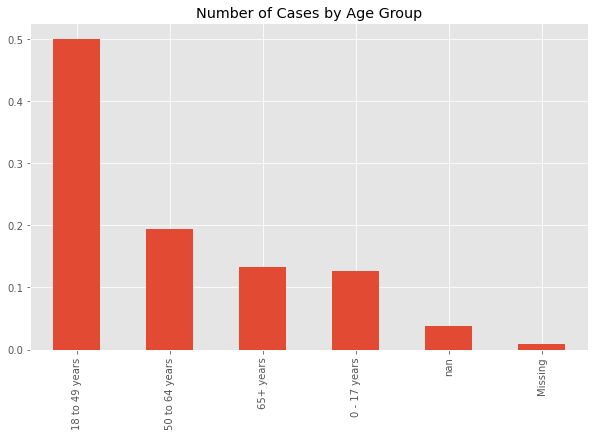

In [47]:
fig, ax = plt.subplots(figsize=(10, 6))
df['age_group'].value_counts(dropna=False, normalize=True).plot(kind='bar', ax=ax)
ax.set_title('Number of Cases by Age Group');

In [48]:
def plot_quick_bar_chart(df, column, title=None, figsize=(10, 6), normalize=False):
    if not title:
        title = 'Number of Cases by ' + column.title()
    
    fig, ax = plt.subplots(figsize=figsize)
    df[column].value_counts(dropna=False, normalize=normalize).plot(kind='bar', ax=ax)
    ax.set_title(title);

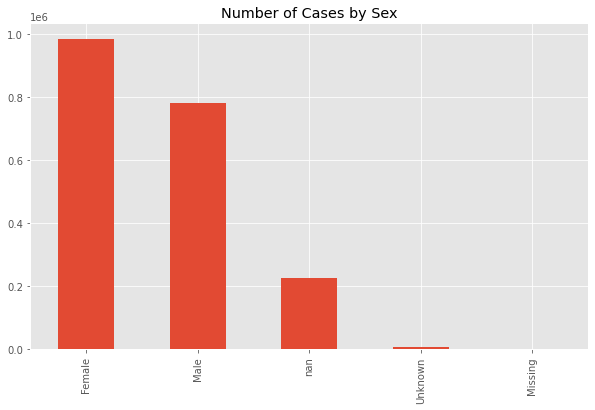

In [49]:
plot_quick_bar_chart(df, 'sex')

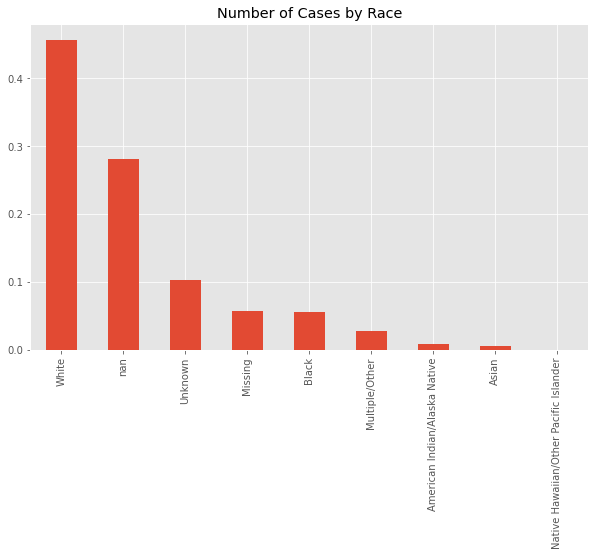

In [50]:
plot_quick_bar_chart(df, 'race', normalize=True)

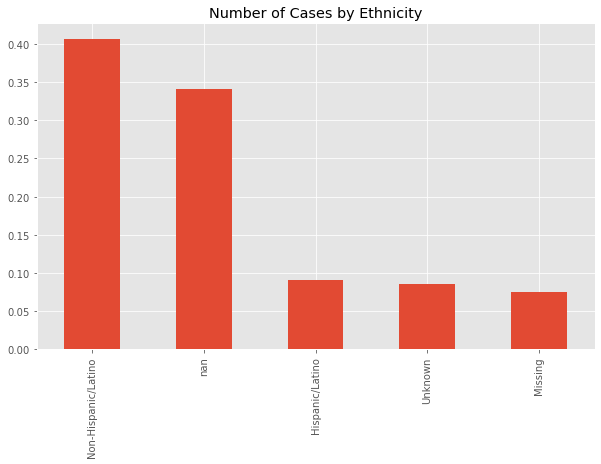

In [51]:
plot_quick_bar_chart(df, 'ethnicity', normalize=True)

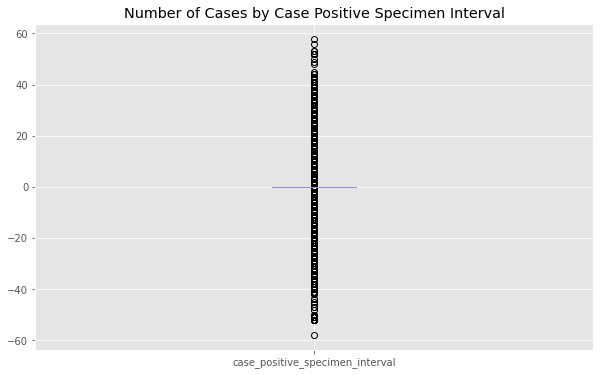

In [52]:
fig, ax = plt.subplots(figsize=(10, 6))
df['case_positive_specimen_interval'].plot(kind='box', ax=ax)
ax.set_title('Number of Cases by Case Positive Specimen Interval');

In [53]:
np.sort(df['case_positive_specimen_interval'].unique())

array([-58., -52., -51., -50., -48., -47., -46., -45., -44., -42., -41.,
       -40., -39., -38., -37., -36., -35., -34., -33., -32., -31., -30.,
       -29., -28., -27., -26., -25., -24., -23., -22., -21., -20., -19.,
       -18., -17., -16., -15., -14., -13., -12., -11., -10.,  -9.,  -8.,
        -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,
         4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,
        15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,
        26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,
        37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  48.,  49.,
        50.,  52.,  53.,  56.,  58.,  nan])

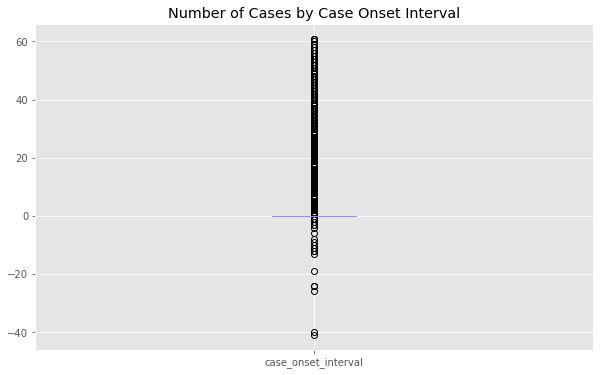

In [54]:
fig, ax = plt.subplots(figsize=(10, 6))
df['case_onset_interval'].plot(kind='box', ax=ax)
ax.set_title('Number of Cases by Case Onset Interval');

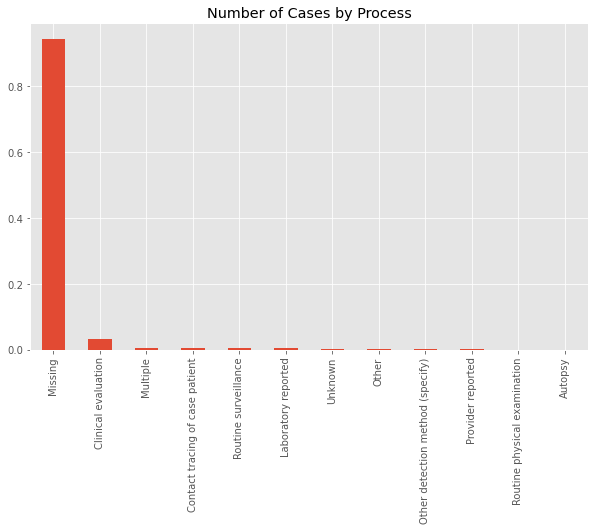

In [55]:
plot_quick_bar_chart(df, 'process', normalize=True)

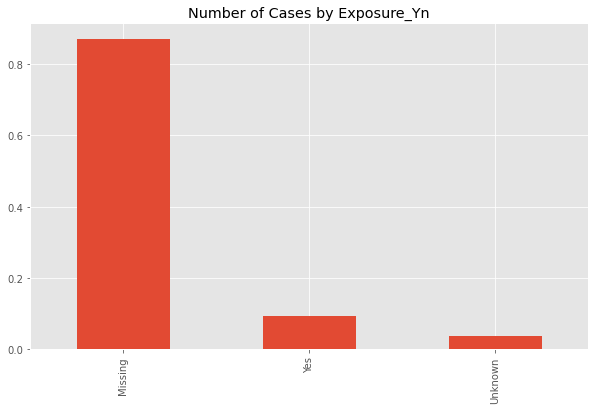

In [56]:
plot_quick_bar_chart(df, 'exposure_yn', normalize=True)

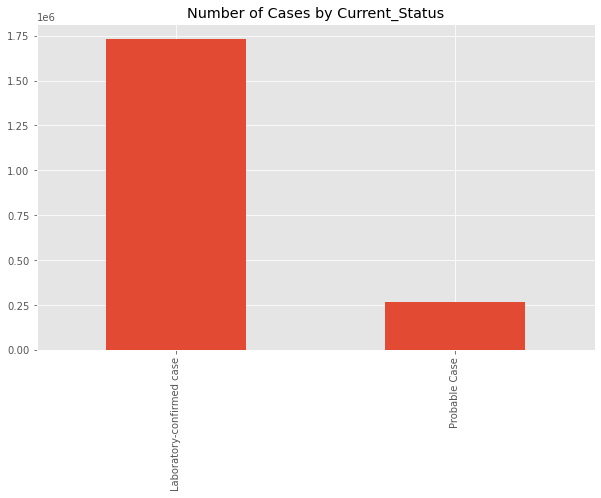

In [57]:
plot_quick_bar_chart(df, 'current_status')

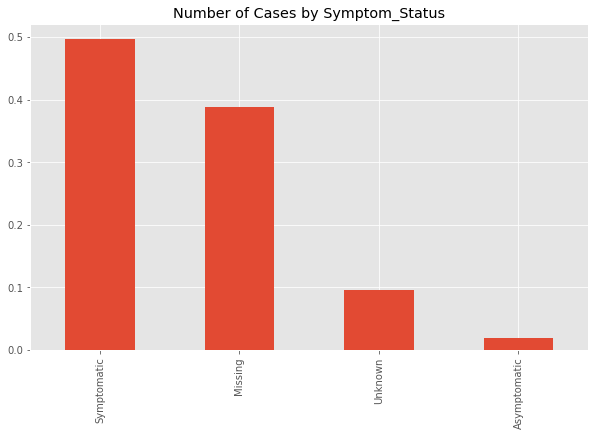

In [58]:
plot_quick_bar_chart(df, 'symptom_status', normalize=True)

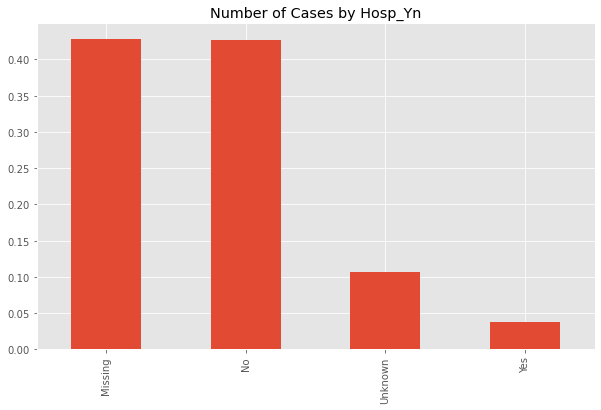

In [59]:
plot_quick_bar_chart(df, 'hosp_yn', normalize=True)

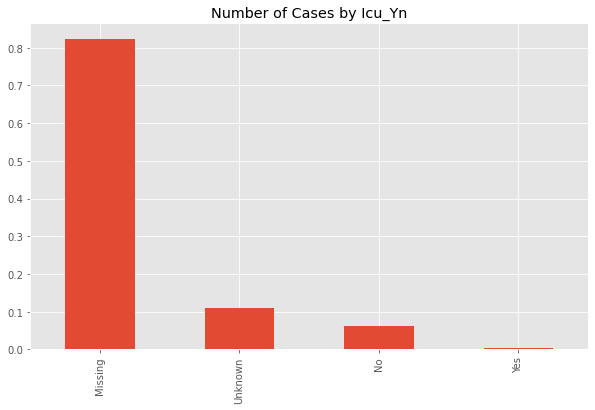

In [60]:
plot_quick_bar_chart(df, 'icu_yn', normalize=True)

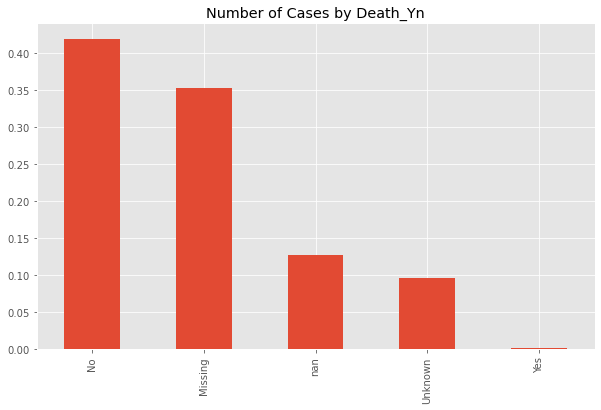

In [61]:
plot_quick_bar_chart(df, 'death_yn', normalize=True)

In [62]:
df

,case_month,res_state,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,...,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn,low_income_score,perc_tribal_ct,perc_rural_ct
0,2020-08,KY,"GRAYSON, KY",21085,0 - 17 years,<NA>,<NA>,<NA>,NaN,0.0,...,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,<NA>,15.0,0.000000,1.000000
1,2021-01,NC,"MARTIN, NC",37117,0 - 17 years,<NA>,<NA>,<NA>,0.0,NaN,...,Unknown,Laboratory-confirmed case,Asymptomatic,No,Unknown,No,<NA>,15.0,0.000000,1.000000
2,2021-03,VT,"FRANKLIN, VT",50011,18 to 49 years,<NA>,<NA>,<NA>,0.0,0.0,...,Yes,Laboratory-confirmed case,Symptomatic,No,Missing,No,Yes,0.0,0.000000,1.000000
3,2020-09,GA,"CATOOSA, GA",13047,0 - 17 years,Female,Unknown,Missing,NaN,NaN,...,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,<NA>,0.0,0.000000,0.090909
4,2021-04,PA,"CLINTON, PA",42035,0 - 17 years,Female,<NA>,<NA>,0.0,0.0,...,Yes,Laboratory-confirmed case,Symptomatic,No,No,<NA>,<NA>,7.0,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,2020-10,ID,"BANNOCK, ID",16005,18 to 49 years,Female,White,Non-Hispanic/Latino,0.0,NaN,...,Missing,Probable Case,Symptomatic,No,Missing,No,<NA>,7.0,0.181818,0.090909
1999996,2021-02,AR,"BENTON, AR",05007,18 to 49 years,Female,White,Non-Hispanic/Latino,0.0,NaN,...,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,Missing,<NA>,0.0,0.122449,0.163265
1999997,2020-08,WI,"BROWN, WI",55009,18 to 49 years,Female,White,Non-Hispanic/Latino,NaN,0.0,...,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,<NA>,0.0,0.203704,0.037037
1999998,2020-12,WI,"CHIPPEWA, WI",55017,18 to 49 years,Female,White,Non-Hispanic/Latino,NaN,NaN,...,Missing,Laboratory-confirmed case,Missing,No,Missing,No,<NA>,0.0,0.000000,0.272727


In [63]:
# pd.plotting.scatter_matrix(df, figsize=(12, 12));

## EDA - Cases with death column completed (yes/no)

In [64]:
df_keep = df[~df['death_yn'].isna()]

In [65]:
df_keep = df_keep[(df_keep['death_yn']=='Yes') | (df_keep['death_yn']=='No')]

In [66]:
df_keep.reset_index(drop=True, inplace=True)

In [68]:
df_keep.head(2)

,case_month,res_state,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,...,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn,low_income_score,perc_tribal_ct,perc_rural_ct
0,2020-08,KY,"GRAYSON, KY",21085,0 - 17 years,<NA>,<NA>,<NA>,NaN,0.0,...,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,<NA>,15.0,0.0,1.0
1,2021-01,NC,"MARTIN, NC",37117,0 - 17 years,<NA>,<NA>,<NA>,0.0,NaN,...,Unknown,Laboratory-confirmed case,Asymptomatic,No,Unknown,No,<NA>,15.0,0.0,1.0


In [88]:
df_keep.describe()

,case_positive_specimen_interval,case_onset_interval,low_income_score,perc_tribal_ct,perc_rural_ct
count,302355.000000,517821.000000,843361.000000,843361.000000,843361.000000
mean,0.337130,0.040452,4.352621,0.078091,0.515714
std,2.220945,0.835983,5.641654,0.216289,0.419962
min,-58.000000,-41.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.090909
50%,0.000000,0.000000,0.000000,0.000000,0.409091
75%,0.000000,0.000000,7.000000,0.000000,1.000000
max,58.000000,59.000000,15.000000,1.000000,1.000000


In [89]:
df_keep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843826 entries, 0 to 843825
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   case_month                       843826 non-null  string 
 1   res_state                        843826 non-null  string 
 2   res_county                       843361 non-null  string 
 3   county_fips_code                 843361 non-null  object 
 4   age_group                        813647 non-null  string 
 5   sex                              757244 non-null  string 
 6   race                             638885 non-null  string 
 7   ethnicity                        597500 non-null  string 
 8   case_positive_specimen_interval  302355 non-null  float64
 9   case_onset_interval              517821 non-null  float64
 10  process                          843826 non-null  string 
 11  exposure_yn                      843826 non-null  string 
 12  cu

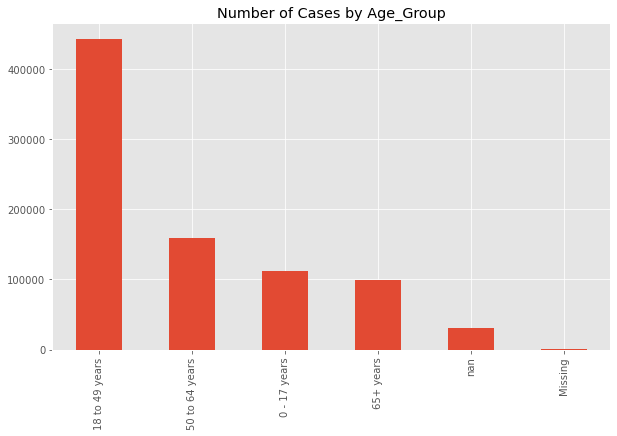

In [71]:
plot_quick_bar_chart(df_keep, 'age_group')

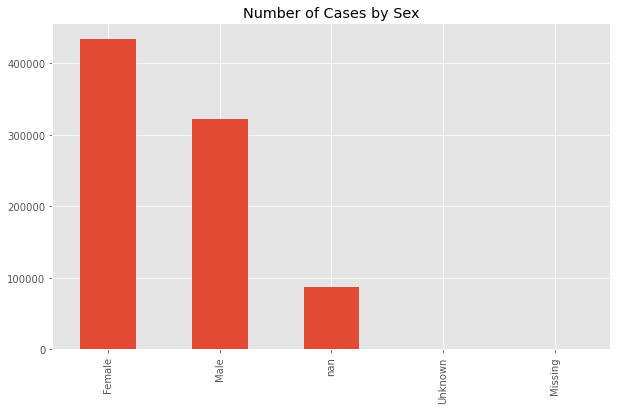

In [72]:
plot_quick_bar_chart(df_keep, 'sex')

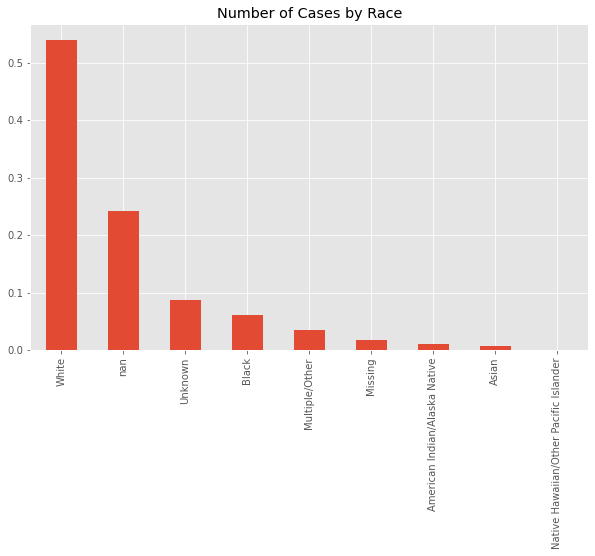

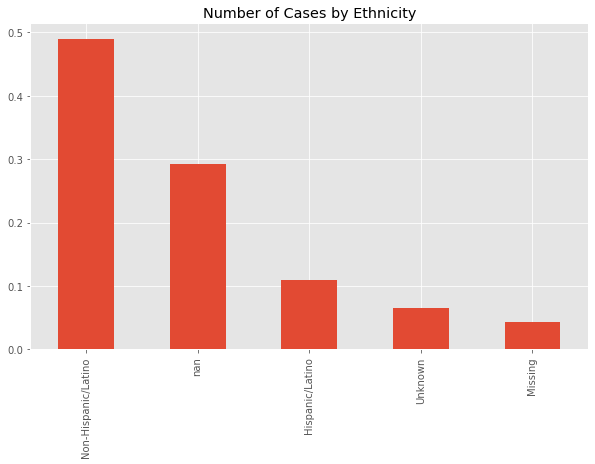

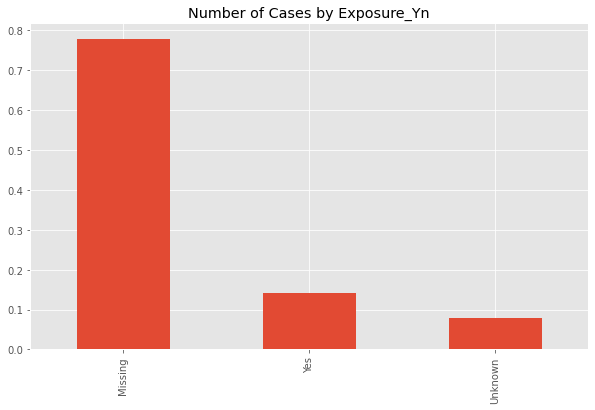

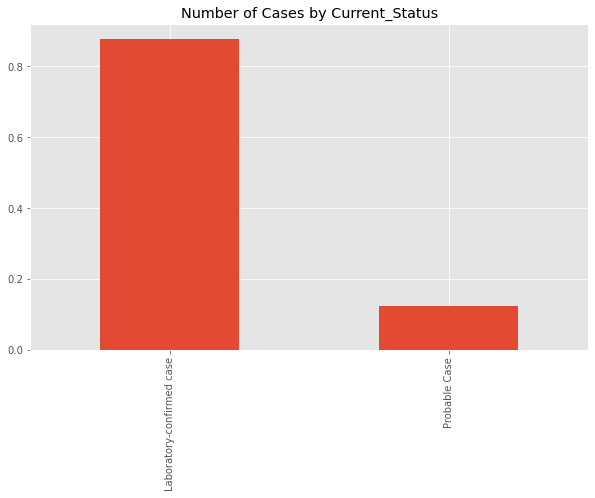

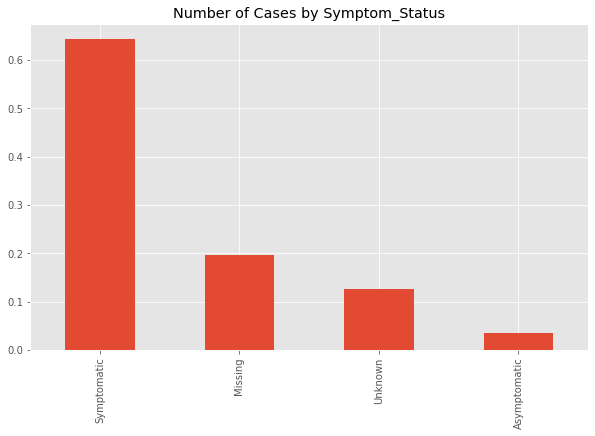

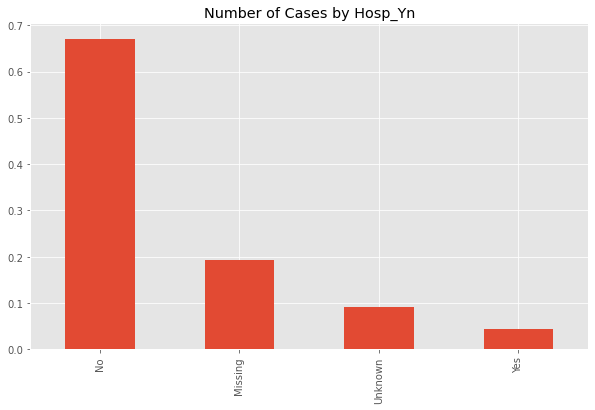

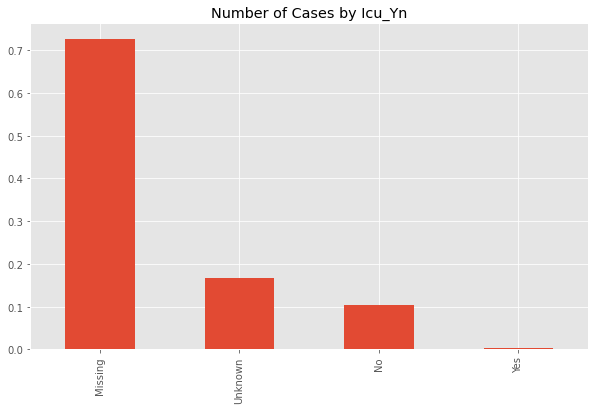

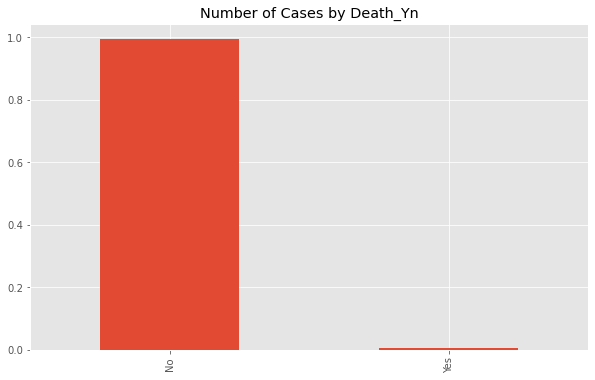

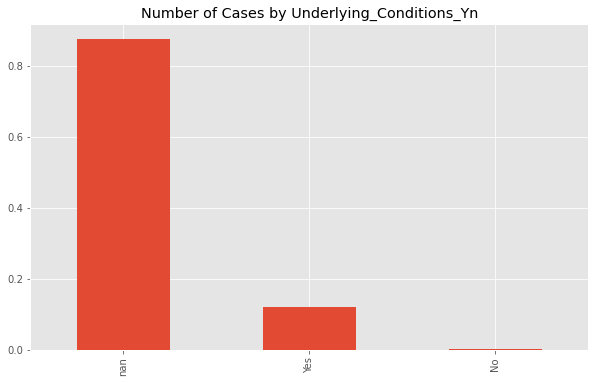

In [76]:
cols = ['race', 'ethnicity', 'exposure_yn', 'current_status', 'symptom_status', 
    'hosp_yn', 'icu_yn', 'death_yn', 'underlying_conditions_yn']
for column in cols:
    plot_quick_bar_chart(df_keep, column, normalize=True)

Percent NaN for yes/no in death column (d.n. include 'missing' or 'unknown')

In [77]:
(df_keep.isna().sum(axis=0)/len(df_keep)) * 100

case_month                          0.000000
res_state                           0.000000
res_county                          0.055106
county_fips_code                    0.055106
age_group                           3.576448
sex                                10.260646
race                               24.287116
ethnicity                          29.191563
case_positive_specimen_interval    64.168561
case_onset_interval                38.634150
process                             0.000000
exposure_yn                         0.000000
current_status                      0.000000
symptom_status                      0.000000
hosp_yn                             0.000000
icu_yn                              0.000000
death_yn                            0.000000
underlying_conditions_yn           87.449427
low_income_score                    0.055106
perc_tribal_ct                      0.055106
perc_rural_ct                       0.055106
dtype: float64

Percent NaN, Unknown, or Missing by column

In [94]:
(((df_keep == 'Missing') | (df_keep == 'Unknown') | df_keep.isna()).sum(axis=0) / len(df_keep)) * 100

case_month                          0.000000
res_state                           0.000000
res_county                          0.055106
county_fips_code                    0.055106
age_group                           3.591025
sex                                10.375006
race                               34.710355
ethnicity                          40.113602
case_positive_specimen_interval    64.168561
case_onset_interval                38.634150
process                            90.852380
exposure_yn                        85.807856
current_status                      0.000000
symptom_status                     32.177961
hosp_yn                            28.552924
icu_yn                             89.340338
death_yn                            0.000000
underlying_conditions_yn           87.449427
low_income_score                    0.055106
perc_tribal_ct                      0.055106
perc_rural_ct                       0.055106
dtype: float64

## EDA - Cases with deaths

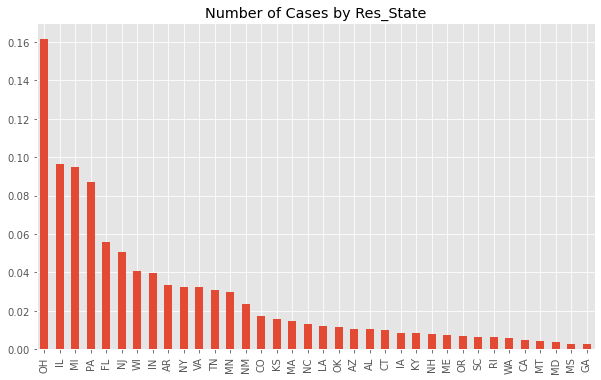

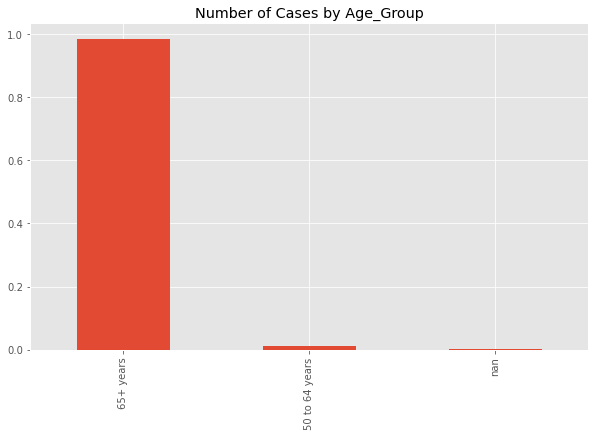

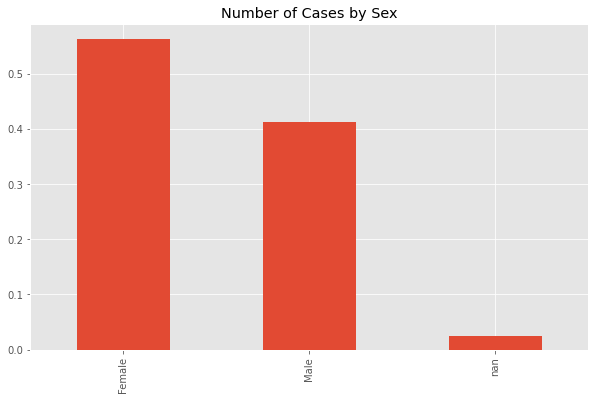

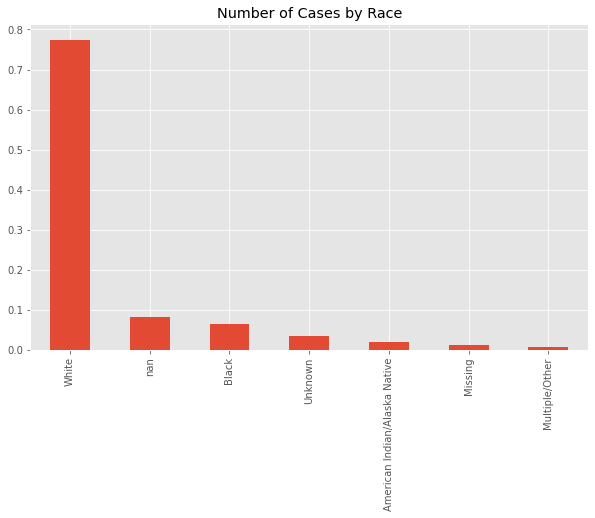

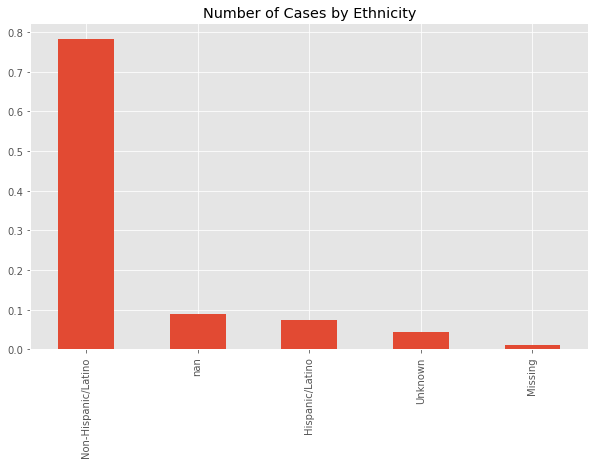

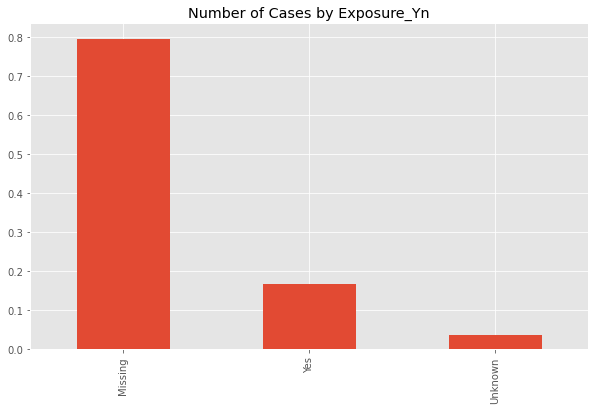

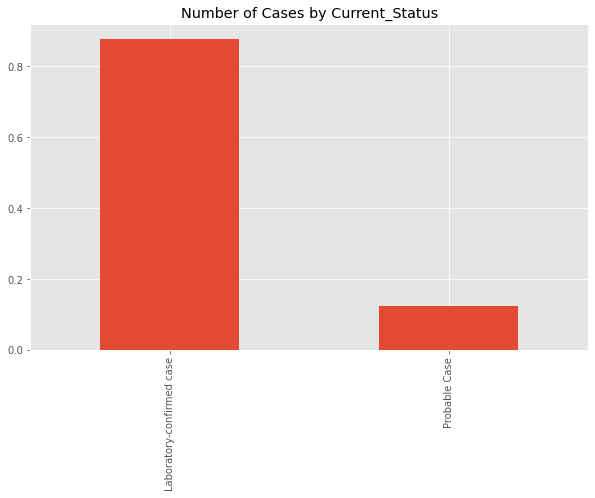

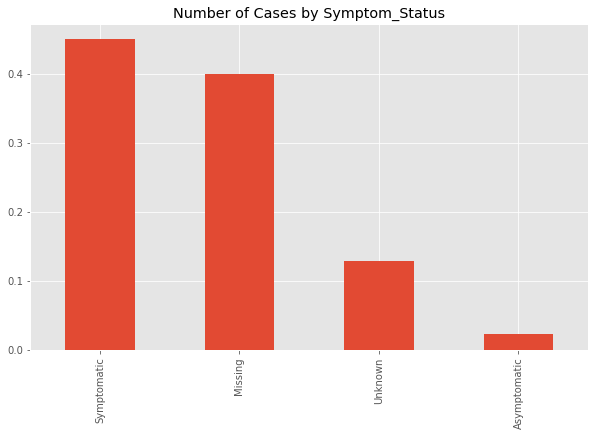

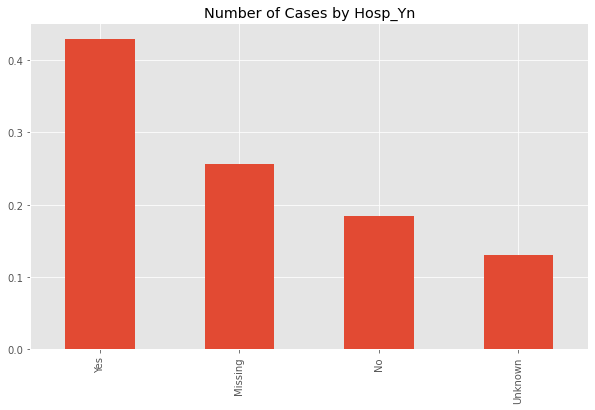

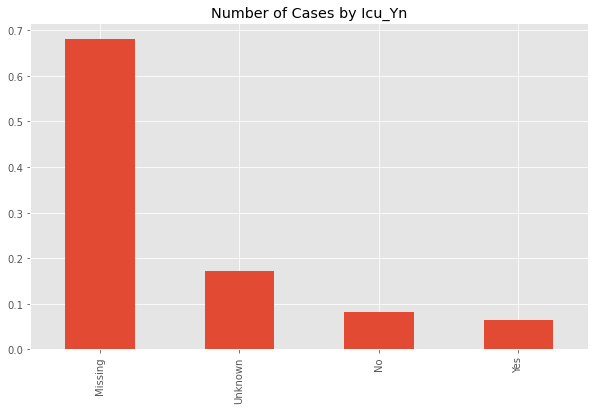

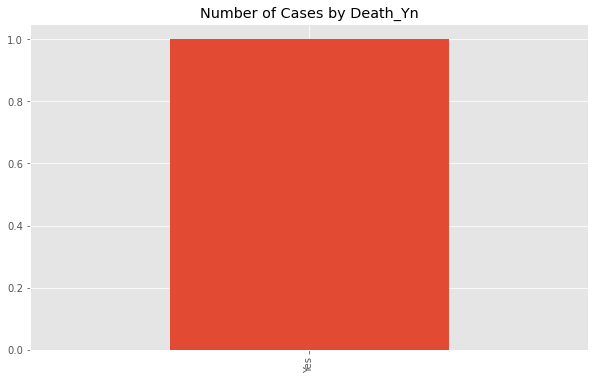

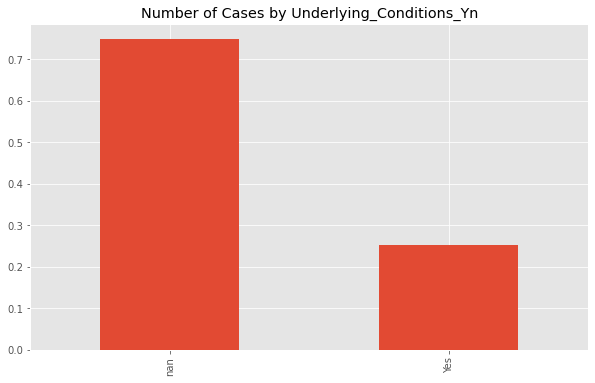

In [97]:
cols = ['res_state', 'age_group', 'sex', 'race', 'ethnicity', 'exposure_yn', 'current_status', 'symptom_status', 'hosp_yn', 'icu_yn', 'death_yn', 'underlying_conditions_yn']
for column in cols:
    plot_quick_bar_chart(df_keep[df_keep['death_yn']=='Yes'], column, normalize=True)

In [70]:
df_keep.head(1)

,case_month,res_state,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,...,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn,low_income_score,perc_tribal_ct,perc_rural_ct
0,2020-08,KY,"GRAYSON, KY",21085,0 - 17 years,<NA>,<NA>,<NA>,NaN,0.0,...,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,<NA>,15.0,0.0,1.0
